In [227]:
#import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer, PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model

## 1. Business Understanding
Valuing a home is not easy for everyone, both sellers and buyers. Learning the rules to determine the value of a home from previously collected information is an interesting job.

Using this dataset, I will answer three questions:

Q1: What factors influence 'SalePrice' the most?

Q2: Is there any way to predict the price of a house ('SalePrice')?

Q3: How to extract higher-order information from the original features, in other words how to reduce the number of features and still be able to predict the house price with no loss of accuracy?

## 2. Prepare Data
Note: Because the label of the test dataset is not published, I will split the original train set into 3 new sets: train, test, validate

In [228]:
#load data
df = pd.read_csv("./house-prices/train.csv")

In [229]:
#show head dataframe
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [230]:
#show dataframe describe
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [231]:
# Show Columns, non-null Count and Dtype for each features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Numerical and Categorical features

In [232]:
numerical_features = df.columns[df.dtypes != "object"]
print("Numerical features: ", len(numerical_features))

categorical_features = df.columns[df.dtypes == "object"]
print("Categorical features: ", len(categorical_features))

Numerical features:  38
Categorical features:  43


In [233]:
#show head of numerical_features
df[numerical_features].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [234]:
#show head of categorical_features
df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


Missing (NaN) values

In [235]:
#show percent missing data per columns
missing_series = df.isnull().sum()/len(df)
missing_series[missing_series>0].sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [236]:
#show number of row has NaN
print("Number of row has NaN: ", len(df[df.isnull().any(axis=1)]))

Number of row has NaN:  1460


In [237]:
#columns where NaN values have meaning (from ./data_description.txt)
cols_fillna_with_None = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu', 'GarageQual',
                        'GarageCond','GarageFinish','GarageType', 'Electrical', 'KitchenQual', 'SaleType',
                        'Functional', 'Exterior2nd', 'Exterior1st', 'BsmtExposure','BsmtCond','BsmtQual',
                        'BsmtFinType1','BsmtFinType2','MSZoning', 'Utilities']

In [238]:
#replace 'NaN' with 'None' for each columns in cols_fillna_with_None
df[cols_fillna_with_None] = df[cols_fillna_with_None].fillna("None")

In [239]:
#show percent missing data per columns
missing_series = df.isnull().sum()/len(df)
missing_series[missing_series>0].sort_values(ascending=False)

LotFrontage    0.177397
GarageYrBlt    0.055479
MasVnrArea     0.005479
dtype: float64

In [240]:
cols_fillna_with_mean = ["LotFrontage", "GarageYrBlt", "MasVnrArea"]

In [241]:
#replace 'NaN' with mean value for each columns in cols_fillna_with_mean 
df[cols_fillna_with_mean] = df[cols_fillna_with_mean].fillna(df[cols_fillna_with_mean].mean())

In [242]:
#show number of NaN values:
print("Number of NaN: ", df.isnull().sum().sum())

Number of NaN:  0


Label-Encoding

In [243]:
df[categorical_features] = df[categorical_features].apply(LabelEncoder().fit_transform)

Distribution of SalePrice

Skewness: 1.882876
Kurtosis: 6.536282


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


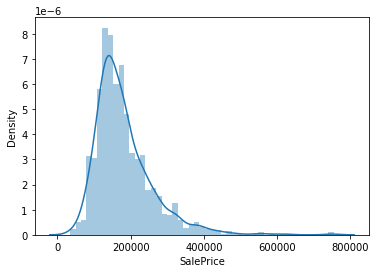

In [244]:
sns.distplot(df['SalePrice'])
#show skewness and kurtosis of SalePrice
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

SalePrice is not normally distributed so I apply log transformation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.121335
Kurtosis: 0.809532


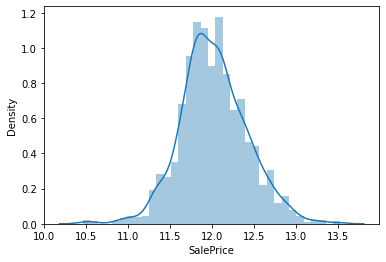

In [245]:
df["SalePrice"] = np.log(df["SalePrice"])

sns.distplot(df["SalePrice"])
#show new skewness and kurtosis
print("Skewness: %f" % df["SalePrice"].skew())
print("Kurtosis: %f" % df["SalePrice"].kurt())

### 4. Answer Questions base on dataset


Q1: What factors influence 'SalePrice' the most?

In [246]:
df.corr()["SalePrice"].sort_values(ascending=False)

SalePrice      1.000000
OverallQual    0.817184
GrLivArea      0.700927
GarageCars     0.680625
GarageArea     0.650888
                 ...   
HeatingQC     -0.425906
GarageType    -0.503130
KitchenQual   -0.534386
BsmtQual      -0.576968
ExterQual     -0.582163
Name: SalePrice, Length: 81, dtype: float64

Based on the above results, we can see that feature OverallQual has the highest correlation with HousePrice

Q2: Is there any way to predict the price of a house ('SalePrice')?

Split to train, test, val dataset

In [247]:
X = StandardScaler().fit_transform(df[df.columns[:-1]])
X = X - (X.max(0)+X.min(0))/2
X = X/X.max(axis=0)
y = df[df.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
# X_valid, X_test, y_valid, y_test = train_test_split(X,y,test_size=0.5, random_state=42)

In [248]:
#Using Linear regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [249]:
print("R2 Score: ", linear_model.score(X_train, y_train))
print("Coef: ", linear_model.coef_)
print("Intercept: ", linear_model.intercept_)

R2 Score:  0.8877797598167652
Coef:  [-6.03647339e-03 -3.91285199e-02 -4.92128305e-02 -1.20104035e-01
  1.16889417e-01  2.56188852e-02  3.47939468e-02 -9.71981450e-03
  2.61468770e-02 -1.06704702e-01 -4.01742600e-03  5.94484420e-02
  1.46575782e-02  9.77253351e-03 -2.74520019e-01 -2.04835569e-02
 -2.85063433e-02  3.03487869e-01  1.49382809e-01  1.11793621e-01
  2.89092639e-02  1.46575126e-02  6.18346636e-02 -5.69860189e-02
  3.88678642e-02  5.51310919e-03 -2.34131136e-03 -2.07102083e-02
  2.48021329e-02  3.11709071e-02 -4.75014223e-02  3.35810440e-02
 -2.66396779e-02 -1.82326851e-02  4.48462424e+11  2.54802651e-02
  1.17121476e+11  1.85614497e+11 -4.85489974e+11 -3.11080993e-02
 -1.11617124e-02  3.70509476e-02  3.13634710e-04 -2.97353078e+11
 -1.40898143e+11 -3.90284444e+10  3.62173047e+11  8.89551927e-02
  2.29797297e-02  4.21262136e-02  1.36789993e-02  5.52478039e-02
 -7.40089635e-02 -3.84496691e-02  9.85335670e-02  6.74735009e-02
  6.71630704e-02 -7.11765384e-03 -2.63763355e-02 -4.0

In [250]:
#Example prediction
print("Predict: ", np.exp(linear_model.predict(X_test[0:1])[0]))
print("Actual:  ", np.exp(y_test.iloc[0]))

Predict:  153057.37272782184
Actual:   154499.99999999988


Q3: How to extract higher-order information from the original features, in other words how to reduce the number of features and still be able to predict the house price with no loss of accuracy?

I will use Autoencoder to reduce the data dimension

In [251]:
#architecture
def Vanilla_AE(H=10):
    model = Sequential()
    model.add(InputLayer(input_shape=(80,)))
    model.add(Dense(60, activation='relu'))
    model.add(Dense(H, activation='relu', name='code_layer'))
    model.add(Dense(60, activation='relu'))
    model.add(Dense(80, activation='tanh'))
    model.compile(optimizer='adam', loss='mse')
    return model

In [252]:
ae_model = Vanilla_AE(H=30)

In [253]:
ae_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 60)                4860      
                                                                 
 code_layer (Dense)          (None, 30)                1830      
                                                                 
 dense_34 (Dense)            (None, 60)                1860      
                                                                 
 dense_35 (Dense)            (None, 80)                4880      
                                                                 
Total params: 13,430
Trainable params: 13,430
Non-trainable params: 0
_________________________________________________________________


In [254]:
#train autoencoder
ae_model.fit(X_train, X_train, epochs=100, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/100
4/4 [==============================] - 1s 54ms/step - loss: 0.6129 - val_loss: 0.5634
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 0.5379 - val_loss: 0.5026
Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 0.4785 - val_loss: 0.4402
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 0.4139 - val_loss: 0.3715
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.3470 - val_loss: 0.3061
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 0.2865 - val_loss: 0.2528
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 0.2405 - val_loss: 0.2168
Epoch 8/100
4/4 [==============================] - 0s 12ms/step - loss: 0.2116 - val_loss: 0.1966
Epoch 9/100
4/4 [==============================] - 0s 11ms/step - loss: 0.1955 - val_loss: 0.1843
Epoch 10/100
4/4 [==============================] - 0s 12ms/step - loss: 0.1844 - val_loss: 0.1751
Epoch 11/100
4/4 [=

In [255]:
#use encoder to reduce dimmesion
inputs = ae_model.input
outputs = ae_model.get_layer(name="code_layer").output
encoder = Model(inputs = inputs, outputs = outputs)

In [256]:
#80 -> 30 dim
X_train_2 = encoder.predict(X_train)
X_test_2 = encoder.predict(X_test)

In [257]:
#apply new data
linear_model_2 = LinearRegression()
linear_model_2.fit(X_train_2, y_train)

LinearRegression()

In [258]:
print("R2 Score: ", linear_model_2.score(X_train_2, y_train))
print("Coef: ", linear_model_2.coef_)
print("Intercept: ", linear_model_2.intercept_)

R2 Score:  0.8165729656535036
Coef:  [ 1.5817596e-01  5.6653535e-01  1.2690561e-01  2.3483753e-02
 -1.6897103e-01 -5.2715018e-03  3.1962991e-06 -1.0521878e-03
  7.9792731e-02  7.1463734e-03  1.3642687e-01  4.4275478e-02
 -1.1498807e-01  9.2388093e-03 -7.7004731e-04 -1.3059062e-01
 -2.6410324e-02 -1.0619631e-01 -7.1958371e-02 -4.2872553e+00
  8.2674287e-02 -8.7528760e-03 -6.4158283e-02 -9.1671906e-02
 -1.4421899e-02 -2.7219933e-02 -6.9930017e-02  1.1778370e-02
 -3.8081773e-02 -6.9109246e-02]
Intercept:  12.923873


R2_score after reduce 80 -> 30 features: 0.8166

Accuracy is reduced compared to previous model

In [259]:
poly_model=make_pipeline(PolynomialFeatures(3), LinearRegression())

In [260]:
poly_model.fit(X_train_2,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [261]:
r2_score(poly_model.predict(X_test_2), y_test)

0.5956045083411567

It seems that polynomial regression does not give good results